# Lecture 4 - Exercise

## Code Header

- **Group ID**: 742
- **Members**: 
	- Lukas Bisgaard Kristensen
	- Mads Østergaard Dinesen
	- Máté Tallósi
	- Tudor-Razvan Tatar
- **Date**: 12/10/2022
- **Lecture**: 7 - “Support vector machines” 
- **Dependencies**: Jupyter Notebook, numpy=1.21.5, matplotlib=3.5.2, scipy=1.7.3, seaborn=0.11.2, pandas=1.4.3, scikit-learn=1.1.1
- **Python version**: 3.9+
- **Functionality**: Firstly we split the MINST dataset into train and test subsets by a 90% - 10% ratio and selected a 10.000 sample selection to train the SVM models. We tried 4 different SVM kernels the linear, the polynomial, the RBF (radial basis function), and the sigmoid one. For test accuracy, the RBF kernel made the best result. Secondly, we investigated the training time and the test accuracy of the different input sizes made by SVM with RBF kernel. We can see the training time has exponential growth and the accuracy has logarithmic growth by increasing the input size.

In [1]:
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from helper import plot_confusion_matrix

In [2]:
NUM_OF_SAMPLES = 10000
TEST_SIZE = 0.1

data_filenames = glob.glob('../../Lecture 4/Data/train*.txt')
data_filenames.sort()

datas = [np.loadtxt(filename) for filename in data_filenames]
labels = [[i] * len(datas[i]) for i in range(len(datas))]

original_datas = np.concatenate(datas) / 225.
original_labels = np.concatenate(labels)

train_data, train_label = shuffle(original_datas, original_labels, n_samples=NUM_OF_SAMPLES)
train_data, test_data, train_label, test_label = train_test_split(train_data, train_label, test_size=TEST_SIZE)

print(f'Train data shape: {train_data.shape}')
print(f'Train label shape: {train_label.shape}')
print(f'Test data shape: {test_data.shape}')
print(f'Test label shape: {test_label.shape}')

Train data shape: (9000, 784)
Train label shape: (9000,)
Test data shape: (1000, 784)
Test label shape: (1000,)


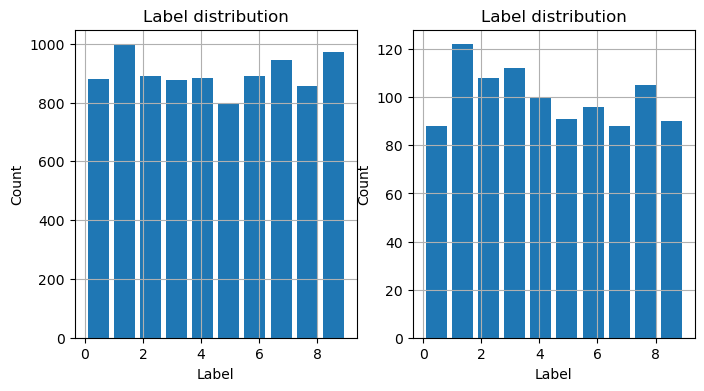

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

for labels, ax in zip([train_label, test_label], axes):
    ax.hist(labels, bins=10, rwidth=0.8)
    ax.set_xlabel('Label')
    ax.set_ylabel('Count')
    ax.grid()
    ax.set_title('Label distribution')

plt.show()

## Try SVM with different kernels

In [4]:
results = dict()

### SVM - Linear kernel

In [5]:
model = svm.SVC(kernel='linear', C=1)

model.fit(train_data, train_label)

train_accuracy = model.score(train_data, train_label)
test_accuracy = model.score(test_data, test_label)

print(f'Train accuracy: {train_accuracy:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')

results['Linear SVM'] = test_accuracy

Train accuracy: 0.9990
Test accuracy: 0.9000


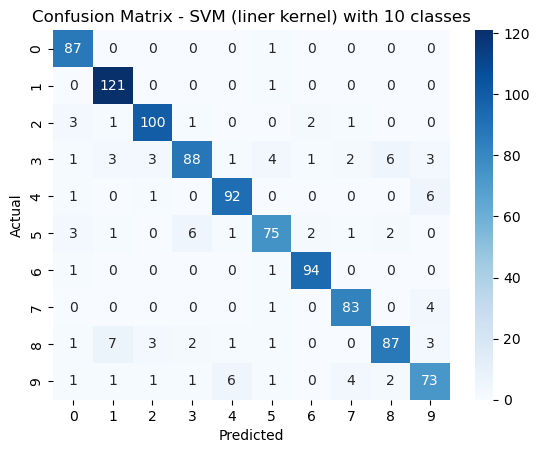

In [6]:
labels = [str(i) for i in range(10)]

pred_label = model.predict(test_data)
cf_matrix = confusion_matrix(test_label, pred_label)

plot_confusion_matrix(cf_matrix, labels, title=f'Confusion Matrix - SVM (liner kernel) with 10 classes')

### SVM - Poly kernel

In [7]:
model = svm.SVC(kernel='poly', C=1, degree=2)

model.fit(train_data, train_label)

train_accuracy = model.score(train_data, train_label)
test_accuracy = model.score(test_data, test_label)

print(f'Train accuracy: {train_accuracy:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')

results['Polynomial SVM'] = test_accuracy

Train accuracy: 0.9826
Test accuracy: 0.9510


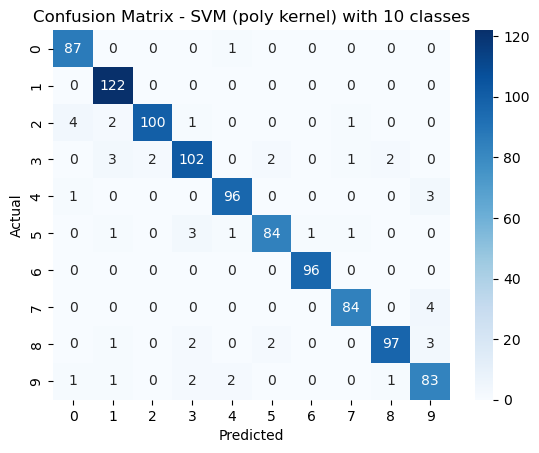

In [8]:
labels = [str(i) for i in range(10)]

pred_label = model.predict(test_data)
cf_matrix = confusion_matrix(test_label, pred_label)

plot_confusion_matrix(cf_matrix, labels, title=f'Confusion Matrix - SVM (poly kernel) with 10 classes')

### SVM - RBF kernel

In [9]:
model = svm.SVC(kernel='rbf', C=1)

model.fit(train_data, train_label)

train_accuracy = model.score(train_data, train_label)
test_accuracy = model.score(test_data, test_label)

print(f'Train accuracy: {train_accuracy:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')

results['RBF SVM'] = test_accuracy

Train accuracy: 0.9852
Test accuracy: 0.9590


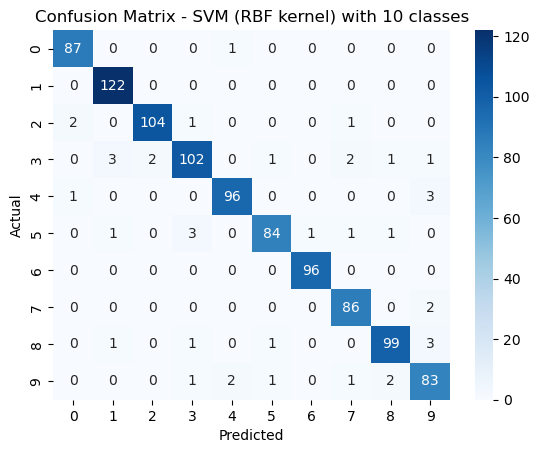

In [10]:
labels = [str(i) for i in range(10)]

pred_label = model.predict(test_data)
cf_matrix = confusion_matrix(test_label, pred_label)

plot_confusion_matrix(cf_matrix, labels, title=f'Confusion Matrix - SVM (RBF kernel) with 10 classes')

### SVM - Sigmoid kernel

In [11]:
model = svm.SVC(kernel='sigmoid', C=1)

model.fit(train_data, train_label)

train_accuracy = model.score(train_data, train_label)
test_accuracy = model.score(test_data, test_label)

print(f'Train accuracy: {train_accuracy:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')

results['Sigmoid SVM'] = test_accuracy

Train accuracy: 0.8173
Test accuracy: 0.8230


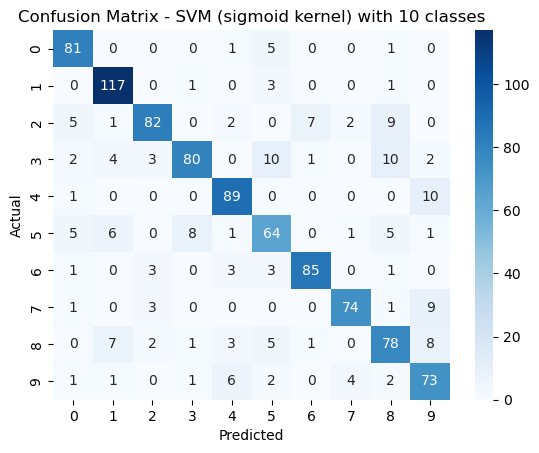

In [12]:
labels = [str(i) for i in range(10)]

pred_label = model.predict(test_data)
cf_matrix = confusion_matrix(test_label, pred_label)

plot_confusion_matrix(cf_matrix, labels, title=f'Confusion Matrix - SVM (sigmoid kernel) with 10 classes')

### Compare the accuracy of the different SVM kerneles

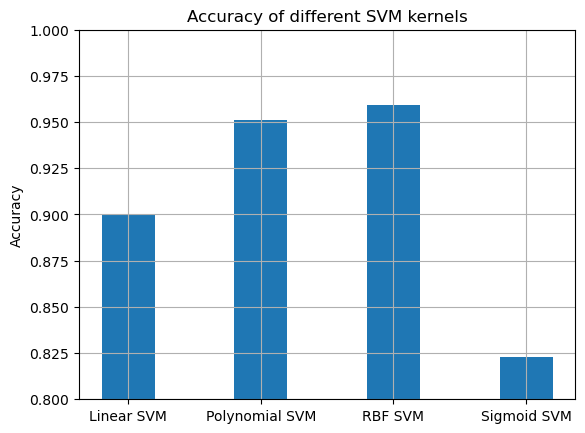

In [13]:
plt.bar(results.keys(), results.values(), width=0.4)
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.title('Accuracy of different SVM kernels')
plt.grid()

## Try SVM - RBF kernel on different input size

In [14]:
INPUT_SIZES = [1000, 5000, 10000, 20000, 30000, 40000, 50000, 60000]
TEST_SIZE = 0.1

input_size_results = dict()

for input_size in INPUT_SIZES:
    train_data, train_label = shuffle(original_datas, original_labels, n_samples=input_size)
    train_data, test_data, train_label, test_label = train_test_split(train_data, train_label, test_size=TEST_SIZE)
    
    model = svm.SVC(kernel='rbf', C=1)
    
    start_time = time.time()
    model.fit(train_data, train_label)
    stop_time = time.time()
    
    train_time = stop_time - start_time
    test_accuracy = model.score(test_data, test_label)
    
    input_size_results[input_size] = (train_time, test_accuracy)
    

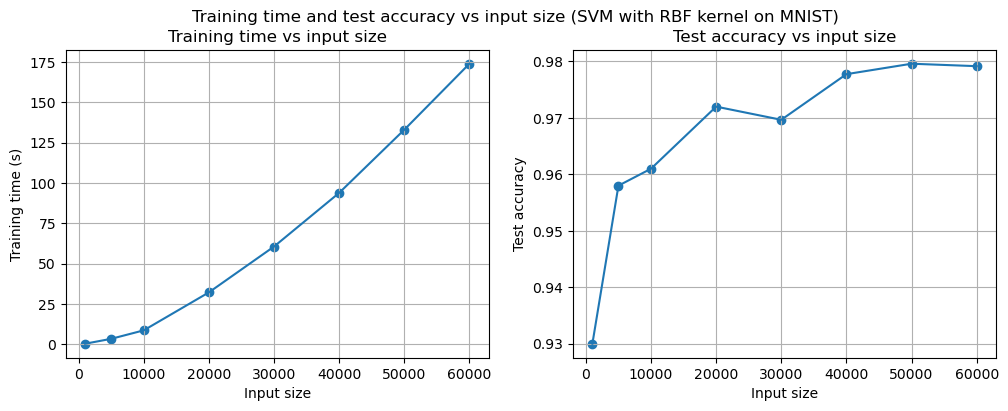

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for index, ax in enumerate(axes):
    ax.plot(input_size_results.keys(), [result[index] for result in input_size_results.values()])
    ax.scatter(input_size_results.keys(), [result[index] for result in input_size_results.values()])
    ax.set_xlabel('Input size')
    ax.grid()

axes[0].set_ylabel('Training time (s)')
axes[1].set_ylabel('Test accuracy')

axes[0].set_title('Training time vs input size')
axes[1].set_title('Test accuracy vs input size')

fig.suptitle('Training time and test accuracy vs input size (SVM with RBF kernel on MNIST)')
plt.show()